this notebook is to show results calcuated in `certain_configs.sh` in a user-friendly way.

In [15]:
from certain_configs import get_candidates_to_visualize, constant_params, dir_dict, keygen, join

In [23]:
%matplotlib inline
from matplotlib import pyplot as plt
from skimage.io import imread
import numpy as np

In [30]:
# python "${DIR}/certain_configs.py" 0.2 0.1 0
# python "${DIR}/certain_configs.py" 1.0 0.1 0
# python "${DIR}/certain_configs.py" 0.02 0.1 0

config_lists = [
    ('0.2', '0.1', 0),
    ('1.0', '0.1', 0),
    ('0.02', '0.1', 0),
]

def visualize_one(tv_weight_str, lp_norm_weight_str, seed):
    for cand in get_candidates_to_visualize():
        print(cand)
        
        img_keys = {'global', 'this'}
        for img_key in img_keys:
            data_this_cand = []
            for cls_to_check in (0, 1, 5):
                data_this_cls = []
                for model_seed in range(3):
                    param_dict = {
                        **constant_params, **{k: v for (k, v) in cand},
                        **{'pcn_cls': cls_to_check, 'model_seed': model_seed}
                    }
                    key = keygen(**param_dict)
                    img_name = join(
                        dir_dict['visualization'],
                        key,
                        f'visseed{seed}',
                        f'tv{tv_weight_str}',
                        f'lp{lp_norm_weight_str}',
                        img_key + '.png'
                    )
                    im_this = imread(img_name)
                    assert im_this.dtype == np.uint8
#                     print(im_this.shape)
                    data_this_cls.append(im_this)
                # horizontally.
                data_this_cls = np.concatenate(data_this_cls, axis=1)
                print(data_this_cls.shape)
                
                data_this_cand.append(data_this_cls)
            data_this_cand = np.concatenate(data_this_cand, axis=0)
            print(img_key)
            plt.close('all')
            plt.figure(figsize=(20, 12))
            plt.title(img_key)
            plt.imshow(data_this_cand)
            plt.show()
                
def visualize_all():
    for (tv_weight_str, lp_norm_weight_str, seed) in config_lists:
        print((tv_weight_str, lp_norm_weight_str, seed))
        visualize_one(tv_weight_str, lp_norm_weight_str, seed)

('0.2', '0.1', 0)
(('loss_type', 'poisson'), ('pcn_bn', False), ('pcn_final_act', True), ('input_size', 100), ('bn_before_act', True), ('pcn_bn_post', True), ('act_fn', 'softplus'))
(110, 1590, 3)
(110, 1590, 3)
(110, 1590, 3)
this


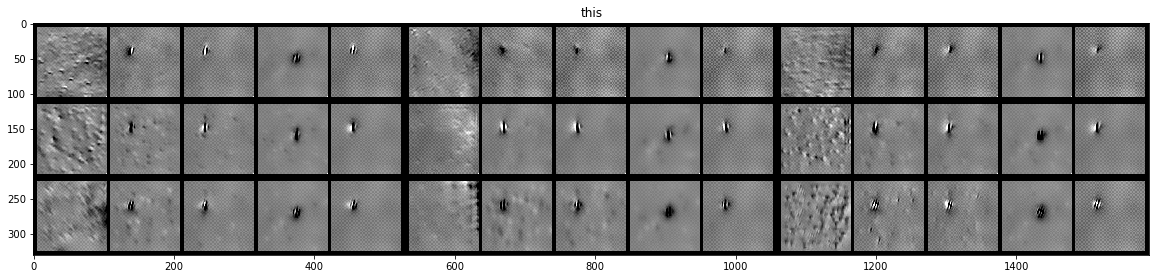

(110, 1590, 3)
(110, 1590, 3)
(110, 1590, 3)
global


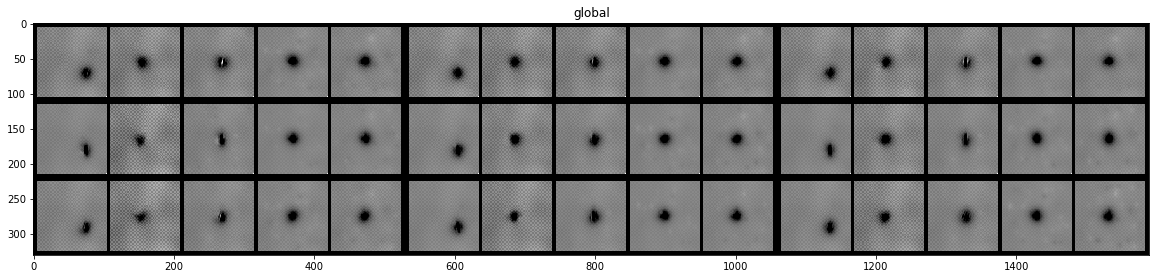

('1.0', '0.1', 0)
(('loss_type', 'poisson'), ('pcn_bn', False), ('pcn_final_act', True), ('input_size', 100), ('bn_before_act', True), ('pcn_bn_post', True), ('act_fn', 'softplus'))
(110, 1590, 3)
(110, 1590, 3)
(110, 1590, 3)
this


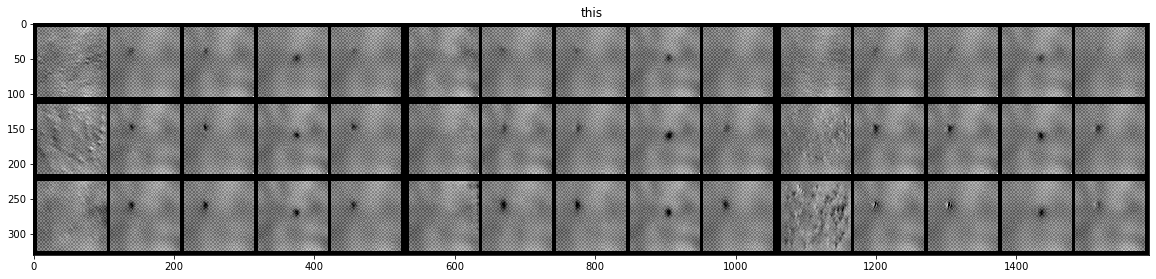

(110, 1590, 3)
(110, 1590, 3)
(110, 1590, 3)
global


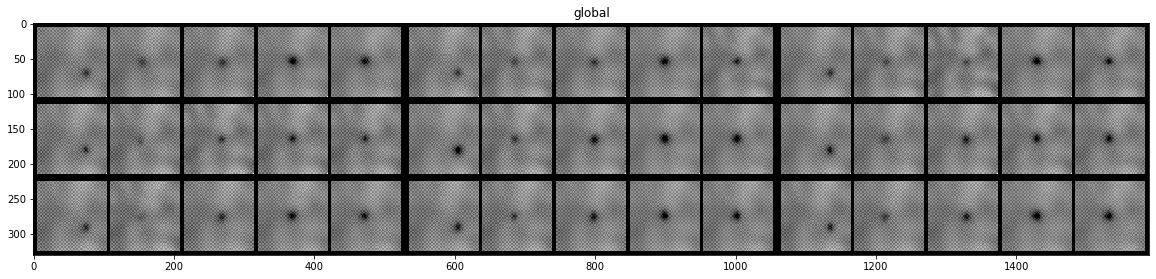

('0.02', '0.1', 0)
(('loss_type', 'poisson'), ('pcn_bn', False), ('pcn_final_act', True), ('input_size', 100), ('bn_before_act', True), ('pcn_bn_post', True), ('act_fn', 'softplus'))
(110, 1590, 3)
(110, 1590, 3)
(110, 1590, 3)
this


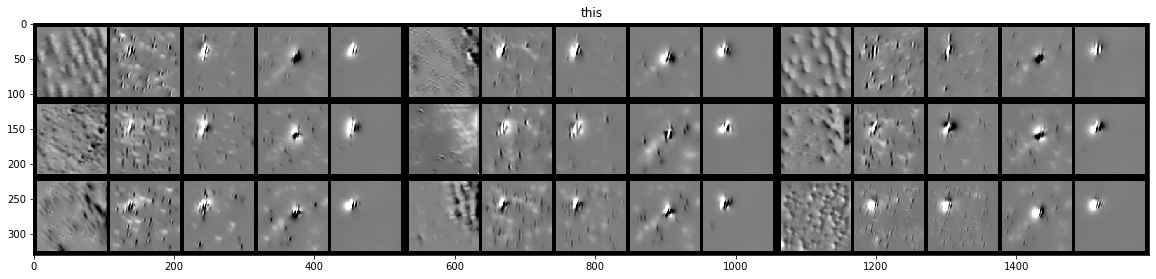

(110, 1590, 3)
(110, 1590, 3)
(110, 1590, 3)
global


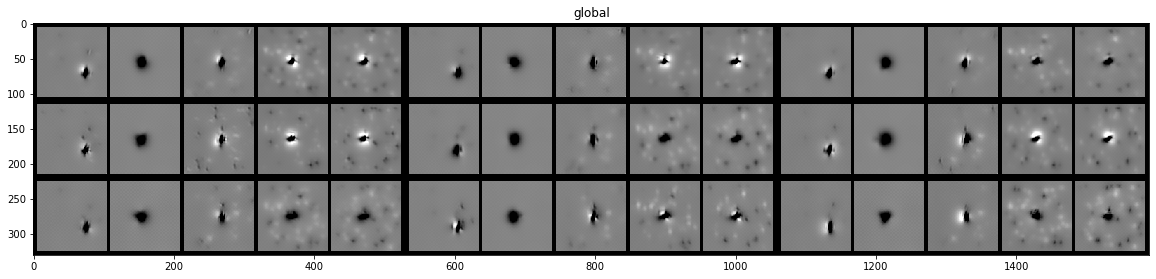

In [31]:
visualize_all()